In [18]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math

In [19]:
def histogram_intersection(hist1, hist2):
    intersect = 0
    
    for i in range(len(hist1)):
        intersect += min(hist1[i],hist2[i])
    return intersect

In [20]:
def video_to_array():
    path = "dataset/DatasetB.avi"
    cap = cv2.VideoCapture(path)
    ret = True
    frames = []
    while ret:
        ret, img = cap.read()
        if ret:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            frames.append(img)
    video_frames = np.stack(frames, axis=0)
    return video_frames

In [21]:
def histogram(image, normalize=True, plot=False, image_show=False):
    hist_ = np.zeros((16,16,16), dtype = np.int16)
    
    if image_show:
        plt.imshow(image)
    col,row, channels = image.shape
    
    for i in range(col):
        for j in range(row):
            red = math.floor(image[i,j,0]/16)
            green = math.floor(image[i,j,1]/16)
            blue = math.floor(image[i,j,2]/16)
            hist_[red, green, blue] += 1
    hist_ = hist_.flatten()
    
    if normalize:
        hist_ = hist_/(row*col)
    
    if plot:
        fig = plt.figure(figsize=(8,8))
        ax = fig.add_subplot(111)
        ax.set_xlabel("Colors")
        ax.set_ylabel("Number")
        ax.grid(True)
        ax.scatter(np.arange(4096), hist_)
        plt.show()
    return hist_
        

In [22]:
frames_ = video_to_array()

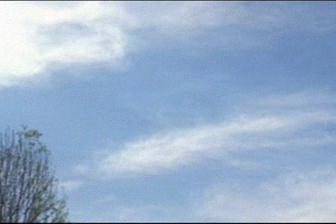

In [23]:
Image.fromarray((frames_[0]).astype(np.uint8))

A histogram function that returns the colour histogram of an input image. Visualize the histogram
and save the corresponding figure. For a given video sequence, use the above function to construct
the histogram of each frame.

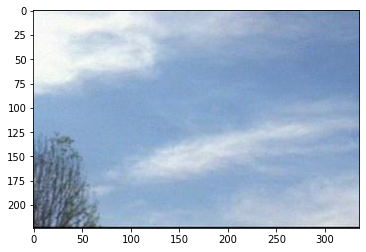

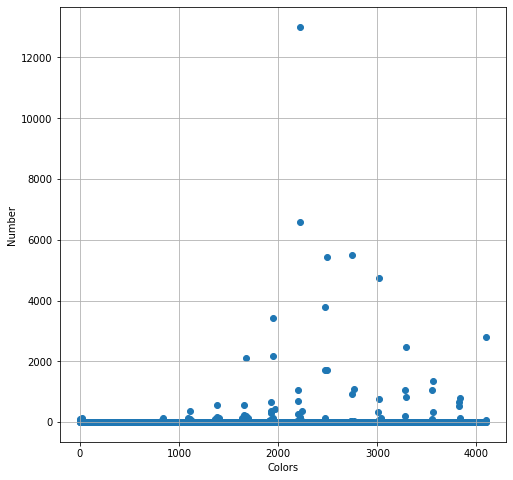

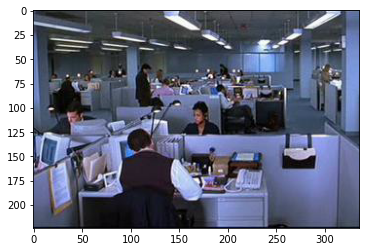

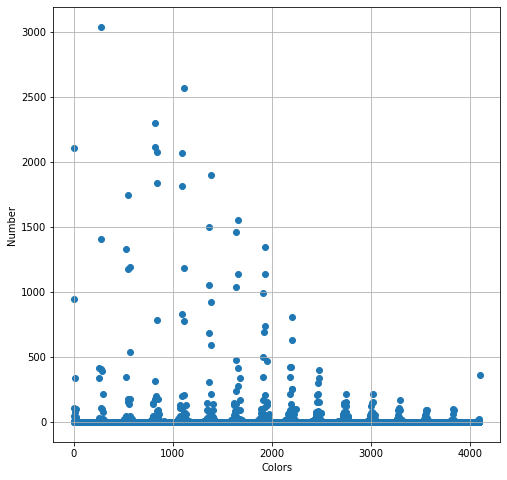

In [24]:
hist_array = np.zeros((2, 4096))
for i in range(0, 200, 100):
    hist_array[i : ] = histogram(frames_[i], normalize=False, plot=True, image_show=True)

In [25]:
hist_array_nt_normalized = np.zeros((len(frames_), 4096))
for i in range(0, len(frames_)):
    hist_array_nt_normalized[i : ] = histogram(frames_[i], normalize=False)

A function that returns the value of the intersection of a pair of histograms. For a given video
sequence, use the histogram intersection function to calculate the intersection between consecutive
frames (e.g. between It and It+1, between It+1 and It+2 and so on).Plot the intersection values over time and the normalised intersection values, and save the corresponding figures.

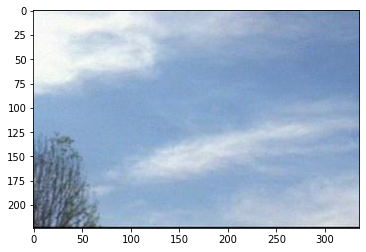

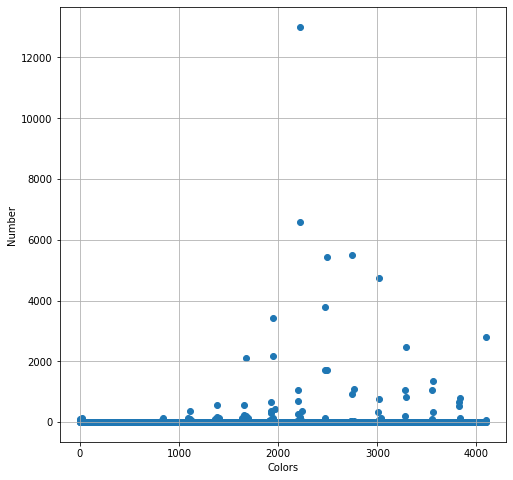

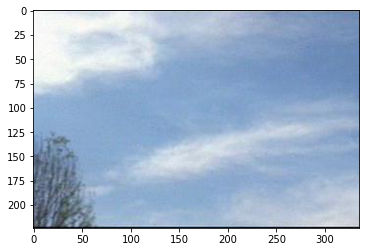

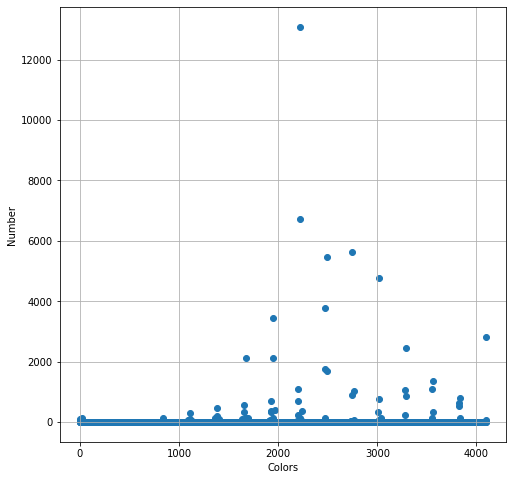

In [26]:
hist_array_ = np.zeros((2, 4096))
for i in range(0, 2):
    hist_array_[i : ] = histogram(frames_[i], normalize=False, plot=True, image_show=True)

In [27]:
hist_intersection_array = np.zeros((1,1))
for i in range(1):
    hist_intersection_array[0, i] = histogram_intersection(hist_array_[i, : ], hist_array_[i+1, : ])

In [28]:
hist_intersection_array[0,0]

74313.0

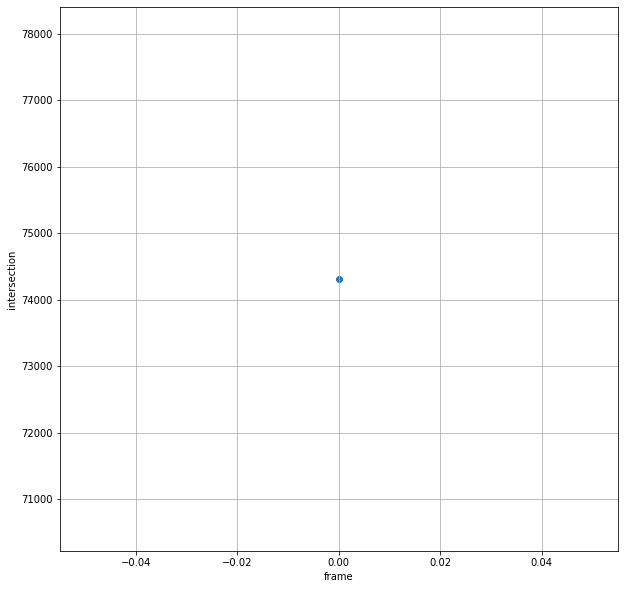

In [29]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_xlabel("frame")
ax.set_ylabel("intersection")
ax.grid(True)
ax.scatter(np.arange(1), hist_intersection_array)
plt.show()

In [30]:
hist_intersection_array = np.zeros((1,len(frames_)-1))
for i in range(len(frames_) - 1):
    hist_intersection_array[0, i] = histogram_intersection(hist_array_nt_normalized[i, : ], hist_array_nt_normalized[i+1, : ])

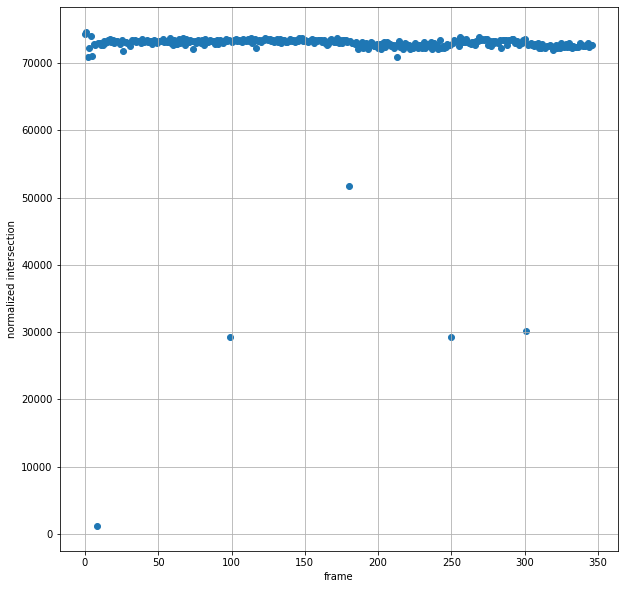

In [31]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_xlabel("frame")
ax.set_ylabel("normalized intersection")
ax.grid(True)
ax.scatter(np.arange(len(frames_) - 1), hist_intersection_array)
plt.show()

In [32]:
hist_array_normalized = np.zeros((len(frames_), 4096))
for i in range(0, len(frames_)):
    hist_array_normalized[i : ] = histogram(frames_[i])

In [33]:
hist_intersection_array_normalized = np.zeros((1,len(frames_)-1))
for i in range(len(frames_) - 1):
    hist_intersection_array_normalized[0, i] = histogram_intersection(hist_array_normalized[i, : ], hist_array_normalized[i+1, : ])

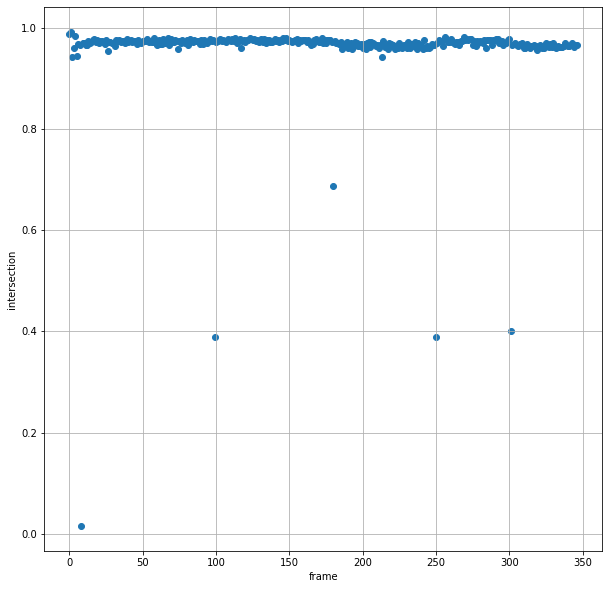

In [34]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_xlabel("frame")
ax.set_ylabel("intersection")
ax.grid(True)
ax.scatter(np.arange(len(frames_) - 1), hist_intersection_array_normalized)
plt.show()